In [1]:
import keras
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU


In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

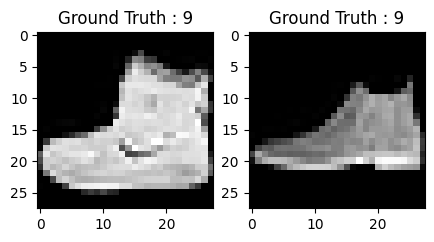

In [5]:
#Open a window for plotting data
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


In [6]:
#Reshape data
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
#Normalize data between 0 and 1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [9]:
print(train_Y_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(test_Y_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
#Split the training and testing data into 80 and 20 configuration
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
cnn = tf.keras.models.Sequential()

batch_size = 64
epochs = 20
num_classes = 10

In [13]:
#Build the convoluational network
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [14]:
#Compiling our convolutional neural network
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [15]:
#Training our convolutional neural network
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 8s 6ms/step - loss: 0.4594 - accuracy: 0.8314 - val_loss: 0.3437 - val_accuracy: 0.8757
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2898 - accuracy: 0.8938 - val_loss: 0.2958 - val_accuracy: 0.8900
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2438 - accuracy: 0.9105 - val_loss: 0.2427 - val_accuracy: 0.9096
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2112 - accuracy: 0.9216 - val_loss: 0.2508 - val_accuracy: 0.9114
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1862 - accuracy: 0.9303 - val_loss: 0.2422 - val_accuracy: 0.9102
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1646 - accuracy: 0.9390 - val_loss: 0.2362 - val_accuracy: 0.9158
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1427 - accuracy: 0.9472 - val_loss: 0.2444 - val_accuracy: 0.9134
Epoch 

In [27]:
#Testing your network
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.44966551661491394
Test accuracy: 0.9144999980926514


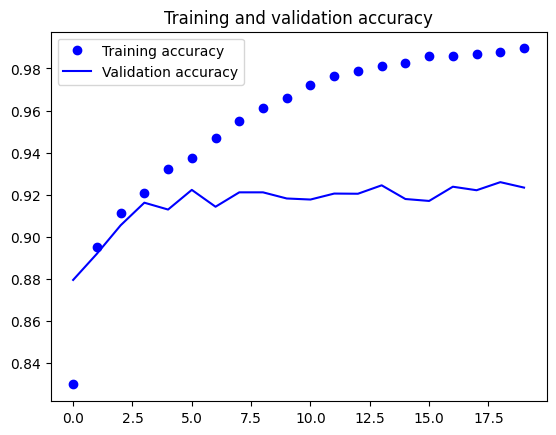

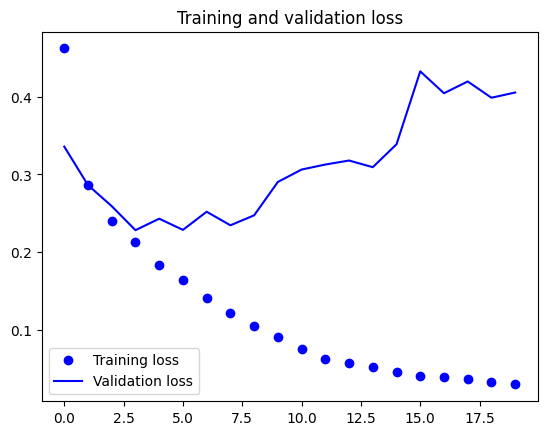

In [29]:
#Plot the accuracy graph
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
#Save the model parameters
fashion_model.save("fashion_model_dropout.h5py")

In [31]:
from tensorflow.keras.layers import Dropout

# Build the convolutional network
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Dropout(0.25))  # First dropout layer with a dropout rate of 0.25
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Dropout(0.25))  # Second dropout layer with a dropout rate of 0.25
fashion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.5))  # Third dropout layer with a dropout rate of 0.5
fashion_model.add(Dense(num_classes, activation='softmax'))

In [32]:
#Compiling our convolutional neural network
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [34]:
# Training our convolutional neural network
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/10
750/750 [==============================] - 8s 7ms/step - loss: 0.6062 - accuracy: 0.7791 - val_loss: 0.3638 - val_accuracy: 0.8626
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3700 - accuracy: 0.8650 - val_loss: 0.3051 - val_accuracy: 0.8867
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3192 - accuracy: 0.8828 - val_loss: 0.2790 - val_accuracy: 0.8965
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2948 - accuracy: 0.8912 - val_loss: 0.2536 - val_accuracy: 0.9058
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2709 - accuracy: 0.9005 - val_loss: 0.2712 - val_accuracy: 0.8976
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2548 - accuracy: 0.9058 - val_loss: 0.2350 - val_accuracy: 0.9135
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2442 - accuracy: 0.9106 - val_loss: 0.2476 - val_accuracy: 0.9079
Epoch 

In [35]:
#Testing your network
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.23305973410606384
Test accuracy: 0.9182999730110168


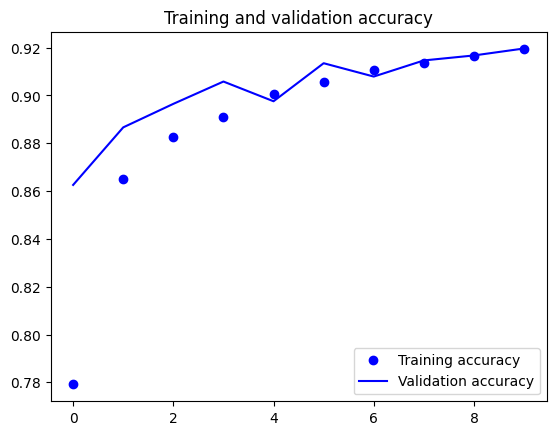

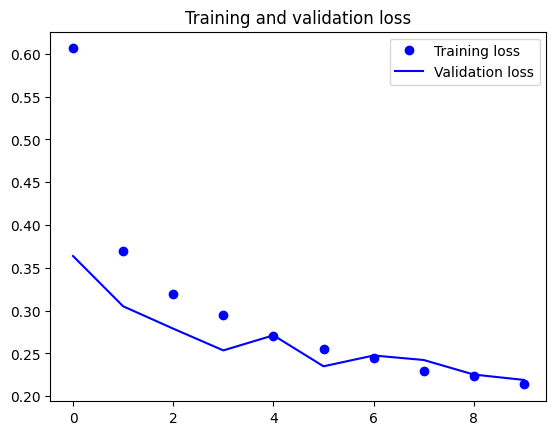

In [36]:
#Plot the accuracy graph
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 [==============================] - 2s 6ms/step
Found 9148 correct labels


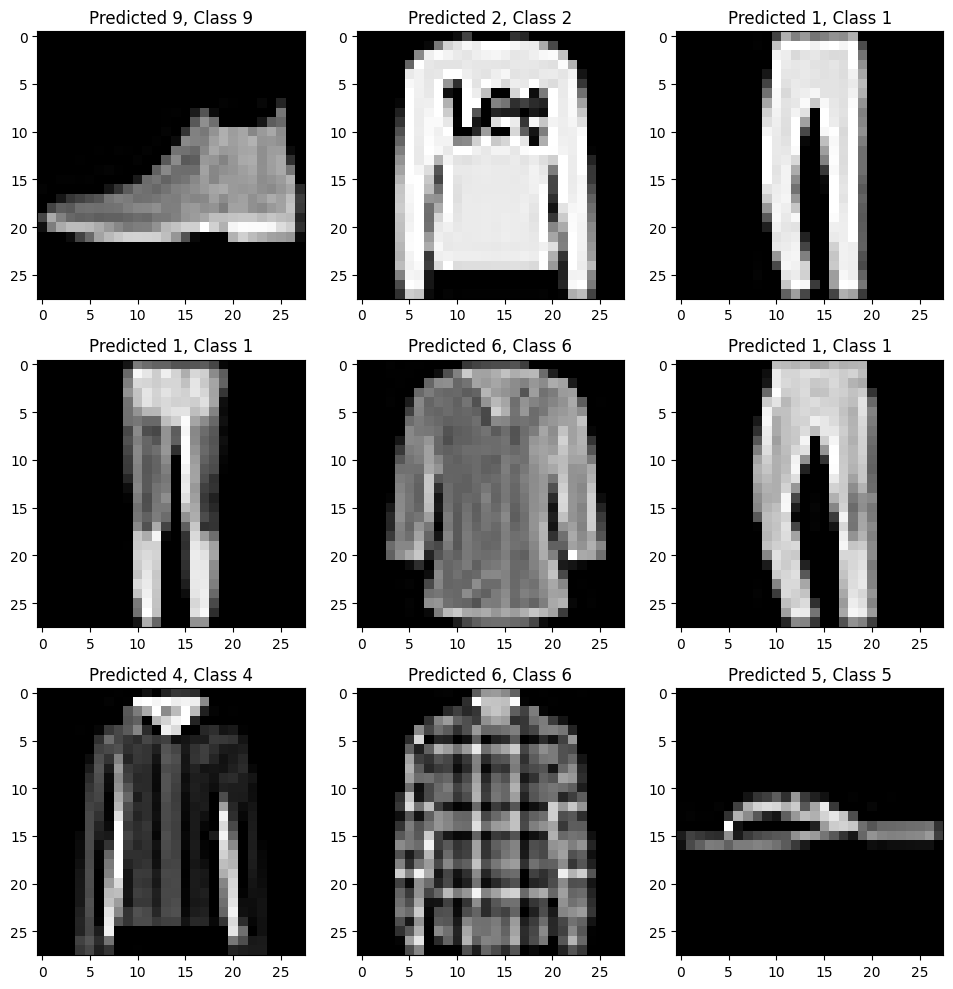

In [16]:
# Predicting labels
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

# Comparing predicted labels with true labels
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))

# Displaying the first 9 correct predictions
plt.figure(figsize=(10, 10))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

plt.show()